# What is ensembling?

In general, ensembling is a technique of combining two or more algorithms of similar or dissimilar types called base learners. This is done to make a more robust system which incorporates the predictions from all the base learners. It can be understood as conference room meeting between multiple traders to make a decision on whether the price of a stock will go up or not.

Since all of them have a different understanding of the stock market and thus a different mapping function from the problem statement to the desired outcome. Therefore, they are supposed to make varied predictions on the stock price based on their own understandings of the market.

Now we can take all of these predictions into account while making the final decision. This will make our final decision more robust, accurate and less likely to be biased. The final decision would have been opposite if one of these traders would have made this decision alone.

You can consider another example of a candidate going through multiple rounds of job interviews. The final decision of candidate’s ability is generally taken based on the feedback of all the interviewers. Although a single interviewer might not be able to test the candidate for each required skill and trait. But the combined feedback of multiple interviewers usually helps in better assessment of the candidate.

## Types of ensembling

Some of the basic concepts which you should be aware of before we go into further detail are:

**Averaging:** It’s defined as taking the average of predictions from models in case of regression problem or while predicting probabilities for the classification problem.

Majority vote: It’s defined as taking the prediction with maximum vote / recommendation from multiple models predictions while predicting the outcomes of a classification problem.

Weighted average: In this, different weights are applied to predictions from multiple models then taking the average which means giving high or low importance to specific model output.


**Boosting:**

Boosting is a sequential technique in which, the first algorithm is trained on the entire dataset and the subsequent algorithms are built by fitting the residuals of the first algorithm, thus giving higher weight to those observations that were poorly predicted by the previous model.

It relies on creating a series of weak learners each of which might not be good for the entire dataset but is good for some part of the dataset. Thus, each model actually boosts the performance of the ensemble.

It’s really important to note that boosting is focused on reducing the bias. This makes the boosting algorithms prone to overfitting. Thus, parameter tuning becomes a crucial part of boosting algorithms to make them avoid overfitting.


Some examples of boosting are XGBoost, GBM, ADABOOST, etc.

**Stacking:**

In stacking multiple layers of machine learning models are placed one over another where each of the models passes their predictions to the model in the layer above it and the top layer model takes decisions based on the outputs of the models in layers below i

Practically speaking, there can be a countless number of ways in which you can ensemble different models. But these are some techniques that are mostly used:

Bagging: Bagging is also referred to as bootstrap aggregation. To understand bagging, we first need to understand bootstrapping. Bootstrapping is a sampling technique in which we choose ‘n’ observations or rows out of the original dataset of ‘n’ rows as well. But the key is that each row is selected with replacement from the original dataset so that each row is equally likely to be selected in each iteration. 


**Model Stacking**

Improve your Predictive Model’s Score using a Stacking Regressor

**“The whole is greater than the sum of its parts.” – Aristotle**

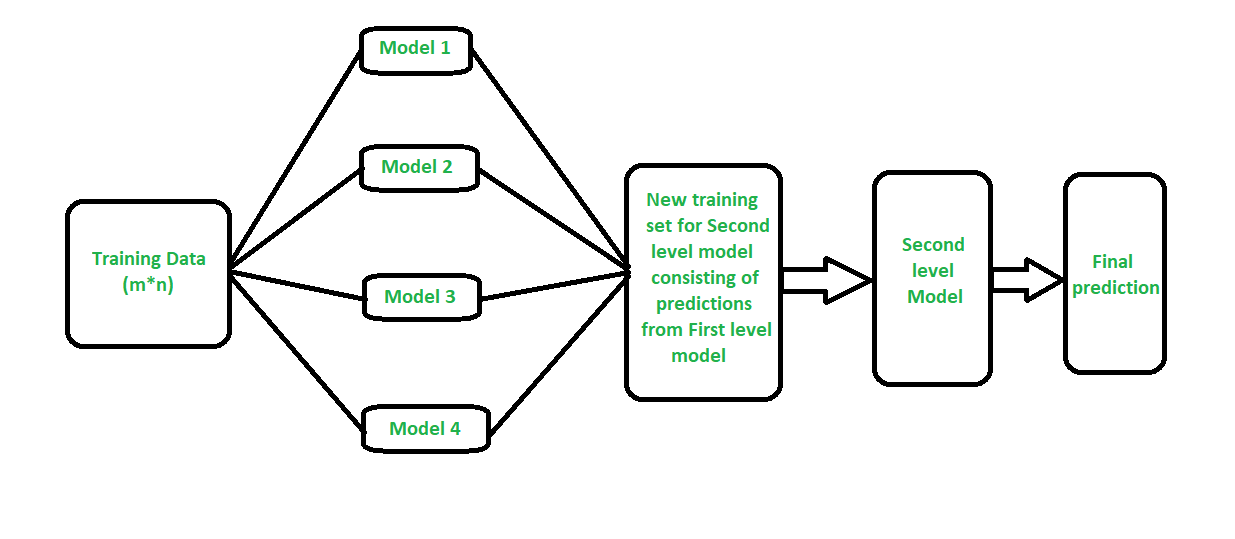!

Stacking is a way to ensemble multiple classifications or regression model. There are many ways to ensemble models, the widely known models are Bagging or Boosting. Bagging allows multiple similar models with high variance are averaged to decrease variance. Boosting builds multiple incremental models to decrease the bias, while keeping variance small.

Stacking (sometimes called Stacked Generalization) is a different paradigm. The point of stacking is to explore a space of different models for the same problem. The idea is that you can attack a learning problem with different types of models which are capable to learn some part of the problem, but not the whole space of the problem. So, you can build multiple different learners and you use them to build an intermediate prediction, one prediction for each learned model. Then you add a new model which learns from the intermediate predictions the same target. This final model is said to be stacked on the top of the others, hence the name. Thus, you might improve your overall performance, and often you end up with a model which is better than any individual intermediate model. Notice however, that it does not give you any guarantee, as is often the case with any machine learning technique.

# How stacking works?

    -We split the training data into K-folds just like K-fold cross-validation.
    A base model is fitted on the K-1 parts and predictions are made for Kth part.

    -We do for each part of the training data.
    The base model is then fitted on the whole train data set to calculate its performance on the test set.

    -We repeat the last 3 steps for other base models.

    Predictions from the train set are used as features for the second level model.

    -Second level model is used to make a prediction on the test set.

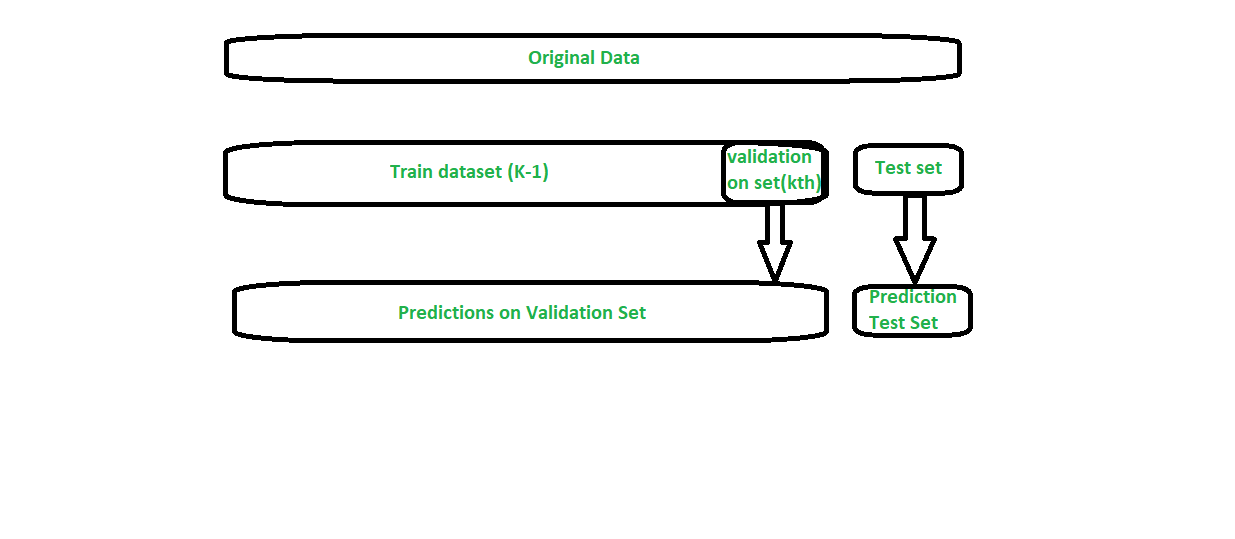!


# Blending

Blending is also an ensemble technique that can help us to improve performance and increase accuracy. It follows the same approach as stacking but uses only a holdout (validation) set from the train set to make predictions. In other words, unlike stacking, the predictions are made on the holdout set only. The holdout set and the predictions are used to build a model which is run on the test set. Here is a detailed explanation of the blending process:

    -The train set is split into two parts, viz-training and validation sets.
    -Model(s) are fit on the training set.
    
    -The predictions are made on the validation set and the test set.
    
    -The validation set and its predictions are used as features to build a new model.
    
    -This model is used to make final predictions on the test and meta-features.

The difference between stacking and blending is that Stacking uses out-of-fold predictions for the train set of the next layer (i.e meta-model), and Blending uses a validation set (let’s say, 10-15% of the training set) to train the next layer.

i will work in blending next notebook .

In [ ]:
#Load the librarys
import pandas as pd #To work with dataset
import numpy as np #Math library
import matplotlib.gridspec as gridspec
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn
import warnings
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier
# Import StandardScaler from scikit-learn
from sklearn.preprocessing import PowerTransformer,StandardScaler,Normalizer,RobustScaler,MaxAbsScaler,MinMaxScaler,QuantileTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.manifold import TSNE
from sklearn.model_selection import GridSearchCV
# Import train_test_split()
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from datetime import datetime, date
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.model_selection import cross_val_score
import lightgbm as lgbm
from catboost import CatBoostRegressor
import  tensorflow as tf 
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
#import smogn
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
# For training random forest model
import lightgbm as lgb
from scipy import sparse
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression,f_classif
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import PolynomialFeatures
from itertools import combinations
#import smong 
from sklearn.linear_model import LinearRegression, RidgeCV
import category_encoders as ce
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
import warnings
warnings.filterwarnings('ignore')


## Step 2: Load the data

Next, we'll load the training and test data.

We set index_col=0 in the code cell below to use the id column to index the DataFrame. (If you're not sure how this works, try temporarily removing index_col=0 and see how it changes the result.)


In [ ]:
# import lux
# Load the training data
train = pd.read_csv("../input/30-days-of-ml/train.csv")
test = pd.read_csv("../input/30-days-of-ml/test.csv")
# Preview the data
train.head()

### Duplicates 

In [ ]:
train.duplicated(subset='id', keep='first').sum()

# Convert Dtypes : 

In [ ]:
train[train.select_dtypes(['float64']).columns] = train[train.select_dtypes(['float64']).columns].apply(pd.to_numeric)
train[train.select_dtypes(['object']).columns] = train.select_dtypes(['object']).apply(lambda x: x.astype('category'))

### Num/Cat Features 

In [ ]:
cat_columns = train.drop(['id','target'], axis=1).select_dtypes(exclude=['int64','float64']).columns
num_columns = train.drop(['id','target'], axis=1).select_dtypes(include=['int64','float64']).columns

##  Target 
###  exploring target data main statistics

In [ ]:
train['target'].describe()

## Define the model features and target
### Extract X and y 

In [ ]:
# Create arrays for the features and the response variable
y = train['target']
X = train.drop(['id','target'], axis=1)

## Create test and train groups

Now we’ve got our dataframe ready we can split it up into the train and test datasets for our model to use. We’ll use the Scikit-Learn train_test_split() function for this. By passing in the X dataframe of raw features, the y series containing the target, and the size of the test group (i.e. 0.1 for 10%), we get back the X_train, X_test, y_train and y_test data to use in the model.

In [ ]:
# Split the dataset and labels into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)
print("{} rows in test set vs. {} in training set. {} Features.".format(X_test.shape[0], X_train.shape[0], X_test.shape[1]))

##  What should we do for each colmun
### Separate features by dtype

Next we’ll separate the features in the dataframe by their datatype. There are a few different ways to achieve this. I’ve used the select_dtypes() function to obtain specific data types by passing in np.number to obtain the numeric data and exclude=['np.number'] to return the categorical data. Appending .columns to the end returns an Index list containing the column names. For the categorical features, we don’t want to include the target income column, so I’ve dropped that.
### Cat Features 

In [ ]:
# select non-numeric columns
cat_columns = train.drop(['id','target'], axis=1).select_dtypes(exclude=['int64','float64']).columns

### Num Features 

In [ ]:
# select the float columns
num_columns = train.drop(['id','target'], axis=1).select_dtypes(include=['int64','float64']).columns

In [ ]:
num_columns=['cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7',
       'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13']
cat_columns=['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8',
       'cat9']
all_columns = (num_columns+cat_columns)
print(cat_columns)
print(num_columns)
print(all_columns)

## check that we have all column

In [ ]:
if set(all_columns) == set(train.drop(['id','target'], axis=1).columns):
    print('Ok')
else:
    # Let's see the difference 
    print('dans all_columns mais pas dans train  :', set(all_columns) - set(train.drop(['id','target'], axis=1).columns))
    print('dans X.columns   mais pas dans all_columns :', set(train.drop(['id','target'], axis=1).columns) - set(all_columns))

In [ ]:
cat_columns2=['cat0', 'cat1', 'cat2']
cat_columns1=['cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9']
num_columns1=[ 'cont1', 'cont2', 'cont3', 'cont4', 'cont5',  'cont7',  'cont9', 'cont10', 'cont11', 'cont12', 'cont13']
num_columns2=['cont0','cont6','cont8']
all_columns1=cat_columns1+cat_columns2+num_columns1+num_columns2
if set(all_columns) == set(train.drop(['id','target'], axis=1).columns):
    print('Ok')
else:
    # Let's see the difference 
    print('dans all_columns mais pas dans train  :', set(all_columns) - set(train.drop(['id','target'], axis=1).columns))
    print('dans X.columns   mais pas dans all_columns :', set(train.drop(['id','target'], axis=1).columns) - set(all_columns))

# Data Modeling
Modeling is the part of the Cross-Industry Standard Process for Data Mining (CRISP-DM) process model that i like best. Our data is already in good shape, and now we can search for useful patterns in our data.

## Compelete prerocess pipe for  Cat dara 

In [ ]:
Encoder = make_pipeline(
            SimpleImputer(strategy='most_frequent',add_indicator=True),
            #OneHotEncoder(handle_unknown='ignore'),
            #LabelEncoder(),
            OrdinalEncoder() ,
            #SparseInteractions(degree=2)
              )

## Num Features :

In [ ]:
Scaler  = make_pipeline( SimpleImputer(strategy='median',add_indicator=True),
                        #PolynomialFeatures(degree=2),
                        RobustScaler(),
                        # PowerTransformer(),
                        # StandardScaler(),
                        # MinMaxScaler(),
                        # QuantileTransformer
)

In [ ]:
cross_validation_design = KFold(n_splits=5,
                                shuffle=True,
                                random_state=77)

cross_validation_design

# Train Catboost / Xgboost / Lgbm
## Define Baseline XGBR 

In [ ]:
class OutlierReplace(BaseEstimator,TransformerMixin):
    def __init__(self,factor=1.5):
        self.factor = factor

    def outlier_removal(self,X,y=None):
        X = pd.Series(X).copy()
        qmin=X.quantile(0.05)
        qmax=X.quantile(0.95)
        q1 = X.quantile(0.25)
        q3 = X.quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (self.factor * iqr)
        upper_bound = q3 + (self.factor * iqr)
        #X.loc[((X < lower_bound) | (X > upper_bound))] = np.nan 
        X.loc[X < lower_bound] = qmin
        X.loc[X > upper_bound] = qmax
        return pd.Series(X)

    def fit(self,X,y=None):
        return self

    def transform(self,X,y=None):
        return X.apply(self.outlier_removal)

In [ ]:
from xgboost import XGBRegressor
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression,f_classif
from sklearn.preprocessing import PolynomialFeatures
# Random HyperParameters
xgb_params0 ={'max_depth': 2,
 'learning_rate': 0.07123779922425576,
 'gamma': 0.30000000000000004,
 'min_child_weight': 3, 
 'subsample': 0.9,
 'colsample_bytree': 0.9,
 'reg_alpha': 0.0013832469277755268,
 'reg_lambda': 0.035255154051375526}
###################
xgb_params1 = {'n_estimators': 7000,
            'learning_rate': 0.16,
            'subsample': 0.96,
            'colsample_bytree': 0.12,
            'max_depth': 2,
            'booster': 'gbtree', 
            'reg_lambda': 100.1,
            'reg_alpha': 15.9,
            'random_state':40}
###################
xgb_params2={'n_estimators': 5500, 
 'max_depth': 7, 
 'learning_rate': 0.04228058062291333,
 'gamma': 0.7000000000000001, 
 'min_child_weight': 7,
 'subsample': 0.8,
 'colsample_bytree': 0.1,
 'reg_alpha': 11.70236964019307,
 'reg_lambda': 0.030505390929992562}
###################

xgb_params3 = {
    #'tree_method':'gpu_hist',         ## parameters for gpu
    #'gpu_id':0,                       #
    #'predictor':'gpu_predictor',      #
    'n_estimators': 10000,
    'learning_rate': 0.03628302216953097,
    'subsample': 0.7875490025178415,
    'colsample_bytree': 0.11807135201147481,
    'max_depth': 3,
    'booster': 'gbtree', 
    'reg_lambda': 0.0008746338866473539,
    'reg_alpha': 23.13181079976304,
    'n_jobs':-1,
    'random_state':40}


###################
XGBR0 = XGBRegressor(**xgb_params0,
                    objective='reg:squarederror', 
                    #early_stopping_rounds=100 ,
                    tree_method='gpu_hist',
                    gpu_id=0, 
                    predictor="gpu_predictor"
                   )
###################
XGBR1 = XGBRegressor(**xgb_params1,
                    objective='reg:squarederror', 
                    #early_stopping_rounds=100 ,
                    tree_method='gpu_hist',
                    gpu_id=0, 
                    predictor="gpu_predictor"
                   )
###################
XGBR2 = XGBRegressor(**xgb_params2,
                    objective='reg:squarederror', 
                    #early_stopping_rounds=100 ,
                    tree_method='gpu_hist',
                    gpu_id=0, 
                    predictor="gpu_predictor")
###################
                   
XGBR3 = XGBRegressor(**xgb_params3,
                    objective='reg:squarederror', 
                    #early_stopping_rounds=100 ,
                    tree_method='gpu_hist',
                    gpu_id=0, 
                    predictor="gpu_predictor")
XGBR31 = XGBRegressor(**xgb_params3,
                    objective='reg:squarederror', 
                    #early_stopping_rounds=100 ,
                    #tree_method='gpu_hist',
                    #gpu_id=0, 
                    #predictor="gpu_predictor"
                     )
###################
# Cat Features  
CatBoostEncoder = make_pipeline(
            SimpleImputer(strategy='most_frequent',add_indicator=True),
            ce.cat_boost.CatBoostEncoder(),
            #SparseInteractions(degree=2)
              )
Ordinalencoder = make_pipeline(
            SimpleImputer(strategy='most_frequent',add_indicator=True),
            ce.ordinal.OrdinalEncoder(),
           # SparseInteractions(degree=2)
              )
###################
Robustscaler  = make_pipeline( SimpleImputer(strategy='median',add_indicator=True),
                        #PolynomialFeatures(degree=2),
                        RobustScaler()
)

MaxAbsScaler1  = make_pipeline( SimpleImputer(strategy='median',add_indicator=True),
                        #PolynomialFeatures(degree=2),
                        MaxAbsScaler()
)
Powertransformer = make_pipeline( SimpleImputer(strategy='median',add_indicator=True),
                        #PolynomialFeatures(degree=2),
                        PowerTransformer())
quantiletransformer = make_pipeline( SimpleImputer(strategy='median',add_indicator=True),
                        #PolynomialFeatures(degree=2),
                        QuantileTransformer())

###################

OrdinalEncoder_MaxAbsScaler = make_column_transformer(
    ( OrdinalEncoder , cat_columns),
    ( MaxAbsScaler1, num_columns))
###################

OrdinalEncoder_Powertransformer = make_column_transformer(
    ( OrdinalEncoder , cat_columns),
    ( Powertransformer, num_columns))

##################
OrdinalEncoder_RobustScaler = make_column_transformer(
    ( Ordinalencoder , cat_columns),
    ( Robustscaler, num_columns))

###################
CatBoostEncoder_RobustScaler = make_column_transformer(
    ( CatBoostEncoder , cat_columns),
    ( RobustScaler, num_columns) )
################### 
Ordinalquantiletransformer = make_column_transformer(
    ( Ordinalencoder , cat_columns),
    ( quantiletransformer , num_columns))    
 #################### Model 0  
XGBpipe0 = Pipeline([
        ('preprocess', OrdinalEncoder_RobustScaler),
        # ('dim_red', SelectKBest(f_regression, k=20)),
        # ('interactions', SparseInteractions(degree=2)),
        ('classifier', XGBR0)])      
 #################### Model 1   
XGBpipe1 = Pipeline([
        ('preprocess', OrdinalEncoder_RobustScaler),
        # ('dim_red', SelectKBest(f_regression, k=20)),
        # ('interactions', SparseInteractions(degree=2)),
        ('classifier', XGBR1)]) 
    
#################### Model 2 
XGBpipe2 = Pipeline([
        ('preprocess', CatBoostEncoder_RobustScaler),
        # ('dim_red', SelectKBest(f_regression, k=20)),
        # ('interactions', SparseInteractions(degree=2)),
        ('classifier', XGBR1)])
    
#################### Model 3    
XGBRpipe3= Pipeline([
        ('preprocess', OrdinalEncoder_MaxAbsScaler),
        # ('dim_red', SelectKBest(f_regression, k=20)),
        # ('interactions', SparseInteractions(degree=2)),
        ('classifier', XGBR1)])  
    
#################### Model 4   
XGBRpipe4 = Pipeline([
        ('preprocess', OrdinalEncoder_Powertransformer),
        # ('dim_red', SelectKBest(f_regression, k=20)),
        # ('interactions', SparseInteractions(degree=2)),
        ('classifier', XGBR1)])
#################### Model 5  
XGBRpipe5= Pipeline([
    ('preprocess', Ordinalquantiletransformer),
    # ('dim_red', SelectKBest(mutual_info_regression, k=20)),
    # ('interactions', SparseInteractions(degree=2)),
    ('classifier', XGBR2)])  
#################### Model 6
XGBRpipe6= Pipeline([
    ('preprocess', OrdinalEncoder_RobustScaler),
    # ('dim_red', SelectKBest(mutual_info_regression, k=20)),
    # ('interactions', SparseInteractions(degree=2)),
    ('classifier', XGBR3)]) 

#################### Model 7  
cat_columns_reduced=[ 'cat1',  'cat3',  'cat5',  'cat7', 'cat8',
       'cat9']
OrdinalEncoder_RobustScaler_reduced = make_column_transformer(
    ('drop',['cat0','cat2' ,'cat4','cat6']),
    ( Ordinalencoder , cat_columns_reduced),
    ( Robustscaler, num_columns)
)   
XGBRpipe7= Pipeline([
    ('preprocess', OrdinalEncoder_RobustScaler_reduced),
    # ('dim_red', SelectKBest(mutual_info_regression, k=20)),
    # ('interactions', SparseInteractions(degree=2)),
    ('classifier', XGBR3)]) 
###############################################
# Define the model 
LGBM_params = {'subsample': 0.8,
     'reg_lambda': 0.002070681206144435,
     'reg_alpha': 23.13,
     'n_estimators': 7000,
     'min_child_weight': 6,
     'max_depth': 2,
     'learning_rate': 0.05,
     'colsample_bytree': 0.11807135201147481}
modelLGBMRegressor1 = lgbm.LGBMRegressor(**LGBM_params,
                                   metric = 'rmse', 
                                   objective= "rmse",
                                   boosting_type= 'gbdt',
                                   device_type='gpu',
                                   # predictor="gpu_predictor", 
                                   n_jobs = -1,
                                   min_child_samples =  27,
                                   #max_bin = 520,
                                   bagging_seed= 42,
                                  # predictor="gpu_predictor"
                                   #cat_l2 = 0.025083670064082797
                                  ) 
LGBMpipe1 = Pipeline([
        ('preprocess', OrdinalEncoder_RobustScaler),
        # ('dim_red', SelectKBest(f_regression, k=20)),
        # ('interactions', SparseInteractions(degree=2)),
        ('classifier', modelLGBMRegressor1)])
############################
LGBM_params = {'n_estimators': 7000,
            'learning_rate':0.034923843361431936,
            'subsample': 0.7000000000000001,
            'colsample_bytree':  0.1,
            'max_depth': 3,
            'booster': 'gbtree', 
            'reg_lambda': 100.1,
            'reg_alpha':0.5333109437994918,
            'reg_lambda': 97.48121524546883,
            'random_state':40}
modelLGBMRegressor2 = lgbm.LGBMRegressor(metric = 'rmse', 
                                   objective= "rmse",
                                   boosting_type= 'gbdt',
                                   device_type='gpu',
                                   n_jobs = -1,
                                   min_child_samples =  27,
                                   #max_bin = 520,
                                   bagging_seed= 42,
                                 #  predictor="gpu_predictor"
                                   #cat_l2 = 0.025083670064082797
                                  ) 
LGBMpipe2 = Pipeline([
        ('preprocess', OrdinalEncoder_RobustScaler),
        # ('dim_red', SelectKBest(f_regression, k=20)),
        # ('interactions', SparseInteractions(degree=2)),
        ('classifier', modelLGBMRegressor2)])

##############################
catmodel = CatBoostRegressor(iterations=9000,
                              learning_rate=0.5932074045035394,
                              loss_function="RMSE",
                              random_state=42,
                              verbose=0,
                              thread_count=4,
                              depth=1,
                              reg_lambda=72.51667229513434,
                              #l2_leaf_reg=3.28,
                              task_type="GPU",
                              devices='0:1' )
catpipe = Pipeline([
        ('preprocess', OrdinalEncoder_RobustScaler),
        # ('dim_red', SelectKBest(f_regression, k=20)),
        # ('interactions', SparseInteractions(degree=2)),
        ('classifier', catmodel)])
# Other models to try in the futur 
# from sklearn.ensemble import HistGradientBoostingRegressor
# https://www.kaggle.com/carlmcbrideellis/histogram-gradient-boosting-regression-example

# Define Baseline lgbm 

In [ ]:
print(cat_columns)
print(num_columns )

In [ ]:
cat_columns2=['cat0', 'cat1', 'cat2']
cat_columns1=['cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9']
num_columns1=[ 'cont1', 'cont2', 'cont3', 'cont4', 'cont5',  'cont7',  'cont9', 'cont10', 'cont11', 'cont12', 'cont13']
num_columns2=['cont0','cont6','cont8']
all_columns1=cat_columns1+cat_columns2+num_columns1+num_columns2
if set(all_columns) == set(train.drop(['id','target'], axis=1).columns):
    print('Ok')
else:
    # Let's see the difference 
    print('dans all_columns mais pas dans train  :', set(all_columns) - set(train.drop(['id','target'], axis=1).columns))
    print('dans X.columns   mais pas dans all_columns :', set(train.drop(['id','target'], axis=1).columns) - set(all_columns))

# Ensembling : 

## 1- Simplest Stacking Regressor approach: Averaging Base models

We begin with this simple approach of averaging base models. Build a new class to extend scikit-learn with our model and also to leverage encapsulation and code reuse. Averaged base models class

In [ ]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)
        return self
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)

In [ ]:
listmodels =[XGBR0 ,XGBR1, XGBR2  ,XGBR3 ,modelLGBMRegressor1 ,
             modelLGBMRegressor2 ,catmodel ]

listpipe =[XGBpipe0   ,XGBpipe1 ,XGBpipe2 ,XGBRpipe3,XGBRpipe4 ,
 XGBRpipe5,XGBRpipe6, XGBRpipe7,LGBMpipe1 ,
LGBMpipe2,catpipe ]
averaged_models = AveragingModels(models = (XGBR0 ,XGBR3 ,modelLGBMRegressor1 ,
             modelLGBMRegressor2 ,catmodel  ))
averaged_models_pipe = Pipeline([('data_cleaning', OrdinalEncoder_RobustScaler),
                        ('Stack_reg1', averaged_models)
                        ])

In [ ]:
from sklearn import set_config
set_config(display='diagram')
averaged_models_pipe

In [ ]:
#averaged_models_pipe.fit(X,y)

# 2 Stacking : Adding a Meta-model

The meta-model is used to find the pattern between the base model predictions as features and actual predictions as the target variables.
A single model( Meta-model) is used to learn how to best combine the predictions from the contributing models 




## 2-1 Stacking from scratch step by step : 
We first define a function to make predictions on n-folds of train and test dataset. This function returns the predictions for train and test for each model.
Below is a step-wise explanation for a simple stacked ensemble:

    The train set is split into 10 parts.
    
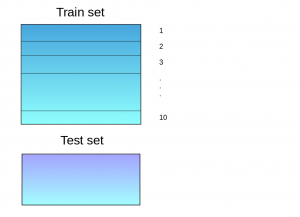!

    A base model (suppose a decision tree) is fitted on 9 parts and predictions are made for the 10th part. This is done for each part of the train set.
    
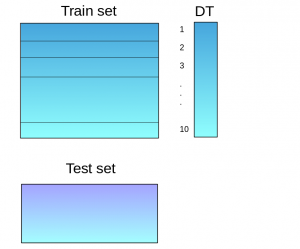!

    The base model (in this case, decision tree) is then fitted on the whole train dataset.
    Using this model, predictions are made on the test set.
    
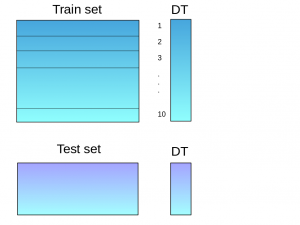

    Steps 2 to 4 are repeated for another base model (say knn) resulting in another set of predictions for the train set and test set.
    
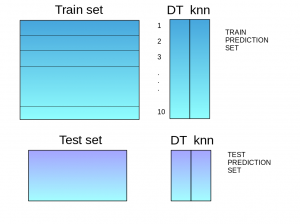

    The predictions from the train set are used as features to build a new model. 
    
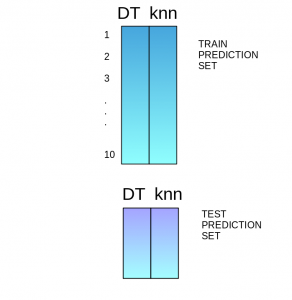


This model is used to make final predictions on the test prediction set.

**Frist let's show how cv work for a single model**

In [ ]:
N_FOLD = 3
test_final= test.drop(['id'], axis=1)
#Setting the kfold parameters
kf = KFold(n_splits=N_FOLD, shuffle=True, random_state = 50)
oof_preds = np.empty((X.shape[0],))
predictions = np.empty((test.shape[0],),float)
model_fi = 0
mean_rmse = 0
Useful_columns= ['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8',
       'cat9', 'cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6',
       'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13']
for num, (train_idx, valid_idx) in enumerate(kf.split(X[0:100])):
    # split the train data into train and validation
    X_train = X.iloc[train_idx][Useful_columns]
    X_valid = X.iloc[valid_idx][Useful_columns]
    y_train = y.iloc[train_idx]
    y_valid = y.iloc[valid_idx]
    
    # Define the Pipeline/model 
    XGBR61 = XGBRegressor(**xgb_params3,
                    objective='reg:squarederror', 
                    #early_stopping_rounds=100 ,
                    tree_method='gpu_hist',
                    gpu_id=0, 
                    predictor="gpu_predictor"
                            )
    XGBRpipe61= Pipeline([
    ('preprocess', OrdinalEncoder_RobustScaler),
    # ('dim_red', SelectKBest(mutual_info_regression, k=20)),
    # ('interactions', SparseInteractions(degree=2)),
    ('classifier', XGBR61)])  
    # Make a copy to avoid changing original data
    X_valid_eval=X_valid.copy()
    # Bundle preprocessing only in a temp pipeline
    eval_set_pipe = OrdinalEncoder_RobustScaler
    # fit transform X_valid.copy()
    X_valid_eval = eval_set_pipe.fit(X_train).transform (X_valid_eval)
    # Train the model
    XGBRpipe61.fit(X_train, y_train,
                  classifier__eval_set=[(X_valid_eval,y_valid)],
                   classifier__early_stopping_rounds=100,
                  classifier__verbose = 0)
    
    #Mean of the predictions
    predictions += XGBRpipe61.predict(test_final) / N_FOLD
    
    #Mean of feature importance
    #model_fi += XGBROrdinalEncoderRobustScalerwithoutreduction_features144.feature_importances_ / N_FOLD 
    
    #Out of Fold predictions
    oof_preds[valid_idx] = XGBRpipe61.predict(X_valid)
    fold_rmse = np.sqrt(mean_squared_error(y_valid, oof_preds[valid_idx]))
    print(f"Fold {num} | RMSE: {fold_rmse}")
    
    mean_rmse += fold_rmse / N_FOLD
    
print(f"\nOverall RMSE: {mean_rmse}")

**Second we  define a function to make predictions on n-folds of train and test dataset. This function returns the predictions for train and test for each model.**

In [ ]:
test_final= test.drop(['id'], axis=1)
def Stacking(model,eval_set_pipe,train,y,test,n_fold=3):
    N_FOLD = n_fold
    #test_final= test.drop(['id'], axis=1)
    #Setting the kfold parameters
    kf = KFold(n_splits=N_FOLD, shuffle=True, random_state = 50)

     #oof_preds = np.zeros((X.shape[0],)
    #val_pred=np.empty((0,1),float)   
    val_pred=[]
    #predictions = np.zeros((test.shape[0],),float)
    #test_pred=np.empty((test.shape[0],1),float)
    test_pred=[]
    model_fi = 0
    mean_rmse = 0
    Useful_columns= ['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8',
           'cat9', 'cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6',
           'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13']
    for num, (train_idx, valid_idx) in enumerate(kf.split(X)):
        # split the train data into train and validation
        X_train = X.iloc[train_idx][Useful_columns]
        X_valid = X.iloc[valid_idx][Useful_columns]
        y_train = y.iloc[train_idx]
        y_valid = y.iloc[valid_idx]

        
        # Make a copy to avoid changing original data
        X_valid_eval=X_valid.copy()
        # Bundle preprocessing only in a temp pipeline
        #eval_set_pipe = OrdinalEncoder_RobustScaler
        # fit transform X_valid.copy()
        X_valid_eval = eval_set_pipe.fit(X_train).transform (X_valid_eval)
        # Train the model
        model.fit(X_train, y_train,
                      classifier__eval_set=[(X_valid_eval,y_valid)],
                       classifier__early_stopping_rounds=100,
                      classifier__verbose = 0)

        #Mean of the predictions
        #test_pred += pipe.predict(test_final) / N_FOLD
        #test_pred=np.append(test_pred,model.predict(test) )
        
        #test_pred=np.column_stack([test_pred,model.predict(test)])
        test_pred.append(model.predict(test))
        #Mean of feature importance
        #model_fi += pipe.feature_importances_ / N_FOLD 

        #Out of Fold predictions
        val_pred.append(model.predict(X_valid))
        #val_pred.append(model.predict(X_valid))
        # val_pred=np.append(val_pred,model.predict(X_valid))
        fold_rmse = np.sqrt(mean_squared_error(y_valid, model.predict(X_valid)))
        print(f"Fold {num} | RMSE: {fold_rmse}")

        mean_rmse += fold_rmse / N_FOLD
    print(f"\nOverall RMSE: {mean_rmse}")
    return np.mean(np.column_stack(test_pred), axis=1),np.hstack(val_pred)

**Now we’ll create  base models :**

In [ ]:
listofmodels1=[XGBRpipe6,LGBMpipe1]
def get_val_test_data(eval_set_pipe=OrdinalEncoder_RobustScaler,n_fold=3, train=X,test=test_final,y=y,listofmodels=listofmodels1):
    #oof_preds = np.zeros((X.shape[0],)
    val_pred_final=[]                    
    #predictions = np.zeros((test.shape[0],),float)
    #test_pred=np.empty((test.shape[0],1),float)
    test_pred_final=[]
    for model in listofmodels :
        test_pred ,val_pred=Stacking(model=model,eval_set_pipe=OrdinalEncoder_RobustScaler,n_fold=5, train=X,test=test_final,y=y)
        # pred :
        val_pred_final.append(val_pred)
        # test :
        test_pred_final.append(test_pred)
    return  np.column_stack(val_pred_final), np.column_stack(test_pred_final)  

In [ ]:
from datetime import datetime
start = datetime.now()
# your code
#val_pred_final,test_pred_final=get_val_test_data(listofmodels1)
end = datetime.now()
time_taken = end - start
print('Time: ',time_taken) 

    Fold 0 | RMSE: 0.7217289573955751
    Fold 1 | RMSE: 0.7168170011639267
    Fold 2 | RMSE: 0.716900401110619
    Fold 3 | RMSE: 0.7154363369590778
    Fold 4 | RMSE: 0.7183025362169766

    Overall RMSE: 0.717837046569235
    [LightGBM] [Warning] Unknown parameter: predictor
    Fold 0 | RMSE: 0.7226569416740861
    [LightGBM] [Warning] Unknown parameter: predictor
    Fold 1 | RMSE: 0.7173947596450057
    [LightGBM] [Warning] Unknown parameter: predictor
    Fold 2 | RMSE: 0.7173894695872729
    [LightGBM] [Warning] Unknown parameter: predictor
    Fold 3 | RMSE: 0.7154675440143379
    [LightGBM] [Warning] Unknown parameter: predictor
    Fold 4 | RMSE: 0.7189852970496661

    Overall RMSE: 0.7183788023940736
    Time:  0:15:13.279158

In [ ]:
#val_pred_final_df= pd.DataFrame(val_pred_final,columns=['pred1','pred2'])
#test_pred_final_df= pd.DataFrame(test_pred_final,columns=['test1','test2'])
#val_pred_final_df.shape

**Create a third model, LinearRegression, on the predictions of the decision tree and knn models.**

In [ ]:
#meata_model_scratch = LinearRegression()
#meata_model_scratch.fit(val_pred_final_df,y)

**Use this meta model dor final predictions :**

In [ ]:
#scratch_predictions = meata_model_scratch.predict(test_pred_final_df)

final prediction score : 0.74

## 2-2  OOP  Design : 
Steps:

1. Split the data into 2 sets training and holdout set.
2. Train all the base models in the training data.
3. Test base models on the holdout dataset and store the predictions(out-of-fold predictions).
4. Use the out-of-fold predictions made by the base models as input features, and the correct output as the target variable to train the meta-model.

    The first three steps will be done iteratively for the k-folds based on the value of k. If k=5 then we will train the model on the 4 folds and predict on the holdout set (5th fold). Repeating this step for k-times (here,k=5) gives the out-of-fold predictions for the whole dataset. This will be done for all the base models.

    Then meta-model will be trained using the out-of-predictions by all the models as X and the original target variable as y. Prediction of this meta-model will be considered as the final prediction.

In [ ]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.empty((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X.iloc[list(train_index)], y.iloc[list(train_index)])
                y_pred = instance.predict(X.iloc[list(holdout_index)])
                out_of_fold_predictions[list(holdout_index), i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

**fit() –** Cloning the base model and meta-model, Training the base model in 5fold cross-validation, and storing the out of fold predictions. Then training the meta-model using the out-of-fold-predictions.

**predict() –** base model predictions for X will be column stacked and then used as an input for meta-model to predict.

In [ ]:
listofmodels1=[XGBRpipe6,LGBMpipe1]
lasso = Lasso(alpha =0.0005)
stacked_averaged_models = StackingAveragedModels(base_models = (XGBRpipe6,LGBMpipe1),
                                                 meta_model = lasso)

In [ ]:
from sklearn import set_config
set_config(display='diagram')
stacked_averaged_models.fit(X,y)

In [ ]:
preds = stacked_averaged_models.predict(X)
rmse = np.sqrt(mean_squared_error(y,preds))
print(f" | OOP_RMSE: {rmse}")

OOP_RMSE: 0.7109383367142464

# Predifined lib
## Sklearn 


In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor


estimators = [('XGBR',XGBRpipe6),('LGBM',LGBMpipe1)]
     
Stack_Sklearn = StackingRegressor(estimators=estimators,final_estimator=lasso)
Stack_Sklearn_pipe = Pipeline([
  #  ('data_cleaning', data_preprocess),
                      ('Stack_Sklearn', Stack_Sklearn)
                        ])

Stack_Sklearn_pipe.fit(X, y) 
preds = Stack_Sklearn_pipe.predict(X)
rmse = np.sqrt(mean_squared_error(y,preds))
print(f" | Stack_Sklearn_RMSE: {rmse}")

| Stack_Sklearn_RMSE: 0.7108556166688924

## Mlextend Stacking 

In [ ]:
from mlxtend.regressor import StackingRegressor
from mlxtend.data import boston_housing_data
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
# Initializing models


Stack_mlxtend =StackingRegressor(regressors=[XGBRpipe6,LGBMpipe1], 
                         meta_regressor=lasso)
Stack_mlxtend_pipe = Pipeline([
  #  ('data_cleaning', data_preprocess),
                      ('Stack_Sklearn', Stack_mlxtend)
                        ])

Stack_mlxtend_pipe.fit(X, y) 
preds = Stack_mlxtend_pipe.predict(X)
rmse = np.sqrt(mean_squared_error(y,preds))
print(f" | mlxtend_RMSE: {rmse}")

| mlxtend_RMSE: 0.7091052678099321

# Compare the performance 

In [ ]:
import time 
def plot_regression_results(ax, y_true, y_pred, title, scores, elapsed_time):
    """Scatter plot of the predicted vs true targets."""
    ax.plot([y_true.min(), y_true.max()],
            [y_true.min(), y_true.max()],
            '--r', linewidth=2)
    ax.scatter(y_true, y_pred, alpha=0.2)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    ax.set_xlim([y_true.min(), y_true.max()])
    ax.set_ylim([y_true.min(), y_true.max()])
    ax.set_xlabel('True')
    ax.set_ylabel('Predicted')
    extra = plt.Rectangle((0, 0), 0, 0, fc="w", fill=False,
                          edgecolor='none', linewidth=0)
    ax.legend([extra], [scores], loc='upper left')
    title = title + 'n Evaluation in {:.2f} seconds'.format(elapsed_time)
    ax.set_title(title)

In [ ]:
# to evaluate the model
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error,r2_score
import math
fig, axs = plt.subplots(2, 2, figsize=(10, 15))
axs = np.ravel(axs)
errors_list=[]
estimators=[('OOP_stacked',stacked_averaged_models),
           ('Stack_Sklearn',Stack_Sklearn_pipe),
           ('Stack_mlxtend',Stack_mlxtend_pipe)]
for ax, (name, est) in zip(axs, estimators ):
    start_time = time.time()
    model = est.fit(X_train, y_train)
                     
    elapsed_time = time.time() - start_time
    
    pred = model.predict(X_test)
    errors = y_test - model.predict(X_test)
    errors_list.append(errors)
    test_r2= r2_score(np.exp(y_test), np.exp(pred))
    #This metric measures the ratio between actual values and predicted values and takes the log of the predictions and actual values. 
    #Use this instead of RMSE if an under-prediction is worse than an over-prediction. You can also use this when you don’t want to penalize large differences when both of the values are large numbers.
    test_rmsle=math.sqrt(mean_squared_log_error(y_test,pred))
    rmse = np.sqrt(mean_squared_error(y_test,pred))
    plot_regression_results(ax,y_test,pred,name,(r'$R^2={:.3f}$' + '\n' + 
                            r'$RMSLE={:.3f}$'+'\n' + r'$RMSE={:.3f}$').format(test_r2,test_rmsle,rmse),elapsed_time)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

In [ ]:
titles = ['OOP_stacked','Stack_Sklearn','Stack_mlxtend'] 
f,a = plt.subplots(3,1)
a = a.ravel()
for idx,ax in enumerate(a):
    ax.hist(errors_list[idx])
    ax.set_title(titles[idx])
plt.tight_layout()

#  Submit to the competition
We'll begin by using the trained model to generate predictions, which we'll save to a CSV file.


In [ ]:
#preds_valid = Stack_regtype2_pipe.predict(X_test)
#print(mean_squared_error(y_test, preds_valid, squared=False))
#test_final= test.drop(['id'], axis=1)
# Use the model to generate predictions
#predictions = Stack_regtype2_pipe.predict(test_final)
# Save the predictions to a CSV file
Stack_Sklearn_preds=Stack_Sklearn_pipe.predict(test_final)
output1 = pd.DataFrame({'Id': test.id,'target': Stack_Sklearn_preds})
output1.to_csv('Stack_Sklearn_preds.csv', index=False)
Stack_mlxtend_preds=Stack_mlxtend_pipe.predict(test_final)
output2 = pd.DataFrame({'Id': test.id,'target': Stack_mlxtend_preds})
output2.to_csv('Stack_mlxtend_preds.csv', index=False)

# Save the predictions to a CSV file
OOP_scratch_predictions=stacked_averaged_models.predict(test_final)
output = pd.DataFrame({'Id': test.id,'target': OOP_scratch_predictions})
output.to_csv('scratch_predictions.csv', index=False)

## Advantages and Disadvantages of Stacking

Like all other methods in machine learning, stacking has advantages and disadvantages. Here are some of the advantages of stacking:

    Stacking can yield improvements in model performance.
    Stacking reduces variance and creates a more robust model by combining the predictions of multiple models.

Keep in mind that stacking also has the following disadvantages:

    Stacked models can take significantly longer to train than simpler models and require more memory.
    Generating predictions using stacked models will usually be slower and more computationally expensive. This drawback is important to consider if you are planning to deploy a stacked model into production.

# Summary

Stacking is a great way to take advantage of the strengths of different models by combining their predictions. This method has been used to win machine learning competitions and thanks to Scikit-learn, it is very easy to implement. However, the performance improvements that come from stacking do come with a price in the form of longer training and inference times.
Futur imporvement : 
Use stratified CrossValidation :

https://www.kaggle.com/zhangkaihua88/30ml-continuous-target-stratification

reference : 

best links: 
https://www.codeproject.com/Tips/4354591/Step-by-Step-Guide-to-Implement-Machine-Learning-5

https://towardsdatascience.com/ensemble-learning-stacking-blending-voting-b37737c4f483

https://www.analyticsvidhya.com/blog/2020/12/improve-predictive-model-score-stacking-regressor/

https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-for-ensemble-models/

**oop staking from scratch :**

https://github.com/FernandoLpz/Stacking-Blending-Voting-Ensembles/blob/master/stacking.py

https://www.kaggle.com/santiagovaldarrama/30-days-of-ml-stacked-ensembles

https://www.kaggle.com/jeonghojae/blending-and-stacking

https://www.analyticsvidhya.com/blog/2020/12/improve-predictive-model-score-stacking-regressor/

https://www.kaggle.com/hamzaghanmi/stacking-regression-step-by-step


**sklearn has a prebuild stacking models implementation :**

**sklearn stacking :**

https://towardsdatascience.com/a-practical-guide-to-stacking-using-scikit-learn-91e8d021863d

**Add deep learing sklearn stackregresor  :**


https://github.com/sailajak2003/ensemble-/blob/master/ensemble_regression.ipynb


https://sailajakarra.medium.com/ensemble-scikit-learn-and-keras-be93206c54c4

**stacking as many as you want  deepstack lib  :**

https://towardsdatascience.com/the-power-of-ensembles-in-deep-learning-a8900ff42be9

https://github.com/jcborges/DeepStack

**mlxtend : so beautiful representation :**

https://ealizadeh.com/blog/mlxtend-library-for-data-science

https://stackoverflow.com/questions/48079973/xgboost-sample-weights-vs-scale-pos-weight

https://stackoverflow.com/questions/67303447/how-to-use-downsampling-and-configure-class-weight-parameter-when-using-xgboost

https://towardsdatascience.com/ensemble-methods-bagging-boosting-and-stacking-c9214a10a205